In [1]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading beer data file
beer_data = pd.read_csv('beer_data.csv')

In [2]:
# Beer data and top 5 records

beer_data.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [3]:
# Getting review profilename description :Profile name count , unique profile name count, top profile name and frequency details

beer_data.review_profilename.describe()

count             475884
unique             22497
top       northyorksammy
freq                1846
Name: review_profilename, dtype: object

In [4]:
# Beer id description details

beer_data.beer_beerid.describe()

count    475984.000000
mean      21660.550611
std       21793.437326
min           3.000000
25%        1716.000000
50%       13892.000000
75%       39397.000000
max       77317.000000
Name: beer_beerid, dtype: float64

# 1 Data preparation

## Choose only those beers that have at least N number of reviews.

#### Figure out an appropriate value of N using EDA; this may not have one correct answer, but you should not choose beers that have an extremely low number of ratings.

In [5]:
# Getting the frequency by beer id
beer_data['freq'] = beer_data.groupby('beer_beerid')['beer_beerid'].transform('count')
beer_data.sort_values(by='freq',ascending=0)
beer_data.head()

,beer_beerid,review_profilename,review_overall,freq
0,48215,stcules,3.0,1
1,52159,oline73,3.0,4
2,52159,alpinebryant,3.0,4
3,52159,rawthar,4.0,4
4,52159,RangerClegg,3.5,4


In [6]:
beer_data.describe()

,beer_beerid,review_overall,freq
count,475984.000000,475984.000000,475984.000000
mean,21660.550611,3.814827,161.866243
std,21793.437326,0.720411,191.529180
min,3.000000,0.000000,1.000000
25%,1716.000000,3.500000,22.000000
50%,13892.000000,4.000000,89.000000
75%,39397.000000,4.500000,225.000000
max,77317.000000,5.000000,987.000000


In [7]:
beer_data.dtypes

beer_beerid             int64
review_profilename     object
review_overall        float64
freq                    int64
dtype: object

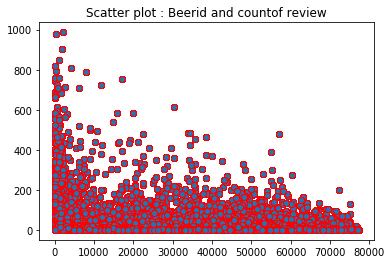

In [8]:
# Scatter plot of the beer id with their frequency
plt.title('Scatter plot : Beerid and countof review')
plt.scatter(x='beer_beerid',y='freq', data = beer_data,edgecolors='r')


In [9]:
# Choosing the value of N : Getting the frequency value between 25% and 75%
x_final = beer_data[(beer_data['freq']<=225) &(beer_data['freq']>=20)]

In [10]:
x_final.head()

,beer_beerid,review_profilename,review_overall,freq
12,436,Brent,3.0,127
18,25414,NJpadreFan,4.0,48
19,25414,vacax,2.5,48
20,25414,mikesgroove,4.0,48
21,25414,hdofu,4.0,48


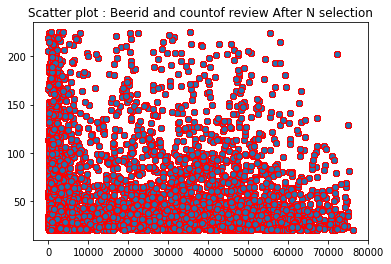

In [11]:
plt.title('Scatter plot : Beerid and countof review After N selection')
plt.scatter(x='beer_beerid',y='freq', data = x_final,edgecolors='r')


In [12]:
# After N selection the data set used for recommendation models are around 52% - 246234 rows out of 475984
x_final.shape

(246234, 4)

# 2 Data exploration

## 1. What are the unique values of ratings?

In [13]:
# Unique values of ratings of the entier beer data set
unique_ratings = beer_data.review_overall.unique()
unique_ratings.sort()
unique_ratings

array([0. , 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

## 2. Visualise the rating values and notice:

###  2.1 The average beer ratings 

In [14]:
beer_rating = beer_data[['beer_beerid','review_overall']]
beer_rating.head()
beer_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 2 columns):
beer_beerid       475984 non-null int64
review_overall    475984 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.3 MB


In [15]:
len(beer_data['beer_beerid'].unique().tolist())

40308

In [16]:
beer_rating_average1 = round(beer_rating.groupby(['beer_beerid']).mean(),2)
beer_rating_average1.head()

,review_overall
beer_beerid,
3,4.25
4,3.67
5,3.55
6,3.71
7,3.32


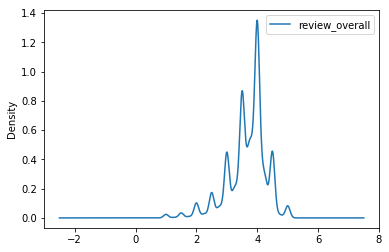

In [17]:
beer_rating_average = beer_rating.groupby(['beer_beerid']).mean().plot(kind='kde')


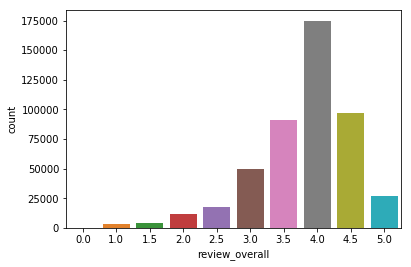

In [18]:
sns.countplot(beer_data['review_overall'])

### 2.2 The average user ratings

In [19]:
review_rating = beer_data[['review_profilename','review_overall']]
review_rating.head()
review_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 2 columns):
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.3+ MB


In [20]:
review_rating_average1 = round(review_rating.groupby(['review_profilename']).mean(),2)
review_rating_average1.head()

,review_overall
review_profilename,
0110x011,4.29
01Ryan10,5.00
03SVTCobra,1.00
04101Brewer,4.00
05Harley,4.16


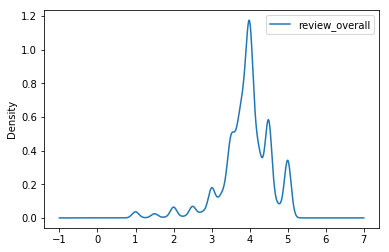

In [21]:
review_rating_average = review_rating.groupby(['review_profilename']).mean().plot(kind='kde')


### 2.3 The average number of ratings given to the beers

In [22]:
# unique beer id in the data set
len(beer_data['beer_beerid'].unique().tolist())

40308

In [23]:
#The average number of ratings given to the beers
round(beer_data['review_overall'].count() / len(beer_data['beer_beerid'].unique().tolist()),2)

11.81

### 2.4 The average number of ratings given by the users

In [24]:
#The average number of ratings given by the users

round(beer_data['review_overall'].count() / len(beer_data['review_profilename'].unique().tolist()),2)

21.16

## 3 Recommendation Models

### 3.1 Divide your data into training and testing dataset.

In [25]:
# For the recommendation modes remove the freq column and remove the duplicates
x_final.info()
x_final.drop(["freq"], axis = 1, inplace = True) 
x_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246234 entries, 12 to 475807
Data columns (total 4 columns):
beer_beerid           246234 non-null int64
review_profilename    246200 non-null object
review_overall        246234 non-null float64
freq                  246234 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 9.4+ MB


C:\Users\NithyaVenkataRamanaR\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 246234 entries, 12 to 475807
Data columns (total 3 columns):
beer_beerid           246234 non-null int64
review_profilename    246200 non-null object
review_overall        246234 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ MB


In [26]:
x_final.head()

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
18,25414,NJpadreFan,4.0
19,25414,vacax,2.5
20,25414,mikesgroove,4.0
21,25414,hdofu,4.0


In [27]:
x_final.info()
x_final.drop_duplicates(['beer_beerid','review_profilename'],inplace=True) 
x_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246234 entries, 12 to 475807
Data columns (total 3 columns):
beer_beerid           246234 non-null int64
review_profilename    246200 non-null object
review_overall        246234 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ MB


C:\Users\NithyaVenkataRamanaR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 245608 entries, 12 to 475807
Data columns (total 3 columns):
beer_beerid           245608 non-null int64
review_profilename    245574 non-null object
review_overall        245608 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ MB


In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(x_final, test_size=0.30, random_state=31)

In [29]:
print(train.shape)
print(test.shape)

(171925, 3)
(73683, 3)


In [30]:
# pivot ratings into beer features
df_beer_features = train.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
).fillna(0)

In [31]:
df_beer_features.head()

review_profilename,nan,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,...,zsk,ztoellner,zuffenhausen,zuggy9,zumicroom,zwan,zymrgy,zymurgy4all,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Copy train and test dataset

In [32]:
dummy_train = train.copy()
dummy_test = test.copy()

In [33]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [34]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
).fillna(1)

# The beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
).fillna(0)

In [35]:
dummy_train.head()

review_profilename,nan,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,...,zsk,ztoellner,zuffenhausen,zuggy9,zumicroom,zwan,zymrgy,zymurgy4all,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [36]:
dummy_test.head()

review_profilename,nan,0110x011,05Harley,0runkp0s,1000Bottles,100floods,1099,11millsown113,11osixBrew,160Shillings,...,ztprez,zuccard,zuffenhausen,zuggy9,zuker,zulufactor,zwan,zymurgy4all,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3.2 Build user-based and item-based models.

### User Similarity Matrix

### Using Cosine Similarity

In [37]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.07499826 0.06159813 ... 0.         0.01085964 0.        ]
 [0.07499826 1.         0.04809425 ... 0.         0.01240306 0.02223901]
 [0.06159813 0.04809425 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.07536567 0.        ]
 [0.01085964 0.01240306 0.         ... 0.07536567 1.         0.04102741]
 [0.         0.02223901 0.         ... 0.         0.04102741 1.        ]]


In [38]:
user_correlation.shape

(3948, 3948)

## Using adjusted Cosine 

In [39]:
beer_features = train.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
)

In [40]:
beer_features.head()

review_profilename,nan,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,...,zsk,ztoellner,zuffenhausen,zuggy9,zumicroom,zwan,zymrgy,zymurgy4all,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Normalising the rating of the beer for each user aroung 0 mean


In [41]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

### Finding cosine similarity

In [42]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.          0.03670765 -0.03713228 ...  0.          0.00977485
   0.        ]
 [ 0.03670765  1.          0.00911133 ...  0.         -0.00715934
  -0.01366707]
 [-0.03713228  0.00911133  1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.         -0.10381658
   0.        ]
 [ 0.00977485 -0.00715934  0.         ... -0.10381658  1.
  -0.00528136]
 [ 0.         -0.01366707  0.         ...  0.         -0.00528136
   1.        ]]


## Prediction

In [43]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.03670765, 0.        , ..., 0.        , 0.00977485,
        0.        ],
       [0.03670765, 1.        , 0.00911133, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00911133, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00977485, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [44]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[0.6368794 , 0.07209398, 0.        , ..., 0.3732867 , 0.05302475,
        0.        ],
       [0.67912809, 0.62065329, 0.        , ..., 0.57429186, 0.00487465,
        0.        ],
       [0.03237929, 0.03072537, 0.        , ..., 0.04604881, 0.        ,
        0.        ],
       ...,
       [1.21334841, 0.66292635, 0.        , ..., 0.26772867, 0.        ,
        0.        ],
       [0.79548032, 0.14004095, 0.        , ..., 0.15080821, 0.58461502,
        0.07553624],
       [0.11432246, 1.32160086, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
user_predicted_ratings.shape

(3948, 14557)

In [46]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

review_profilename,nan,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,...,zsk,ztoellner,zuffenhausen,zuggy9,zumicroom,zwan,zymrgy,zymurgy4all,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,0.636879,0.072094,0.000000,0.000000,0.142397,0.023298,0.000000,0.050085,0.000000,0.125403,...,0.000398,0.0,0.276128,0.047375,0.000000,0.072157,0.110099,0.373287,0.053025,0.000000
7,0.679128,0.620653,0.000000,0.000000,0.138472,0.000000,0.046105,0.000000,0.000000,0.095279,...,0.023765,0.0,0.023623,0.174352,0.011665,0.000000,0.007989,0.574292,0.004875,0.000000
8,0.032379,0.030725,0.000000,0.000000,0.038715,0.102969,0.034822,0.000000,0.000000,0.033071,...,0.039498,0.0,0.000666,0.000000,0.000000,0.000000,0.000000,0.046049,0.000000,0.000000
9,0.350018,0.030862,0.115106,0.000000,0.275523,0.000000,0.071082,0.241605,0.000000,0.024143,...,0.000000,0.0,0.001792,0.061124,0.000000,0.000000,0.131724,0.162128,0.000000,0.000000
10,0.589955,0.452850,0.000000,0.038319,0.767647,0.000000,0.148672,0.069617,0.220116,0.395846,...,0.000000,0.0,0.097342,0.241276,0.000000,0.068501,0.000000,0.357509,0.094313,0.236306


### Finding the top 10 users

In [47]:
user_final_rating.iloc[1].sort_values(ascending=False)[0:10]

review_profilename
feloniousmonk     13.484164
BuckeyeNation     12.555867
brentk56          12.043758
WesWes            11.958445
northyorksammy    11.859139
ChainGangGuy      11.176267
jwc215            11.073067
mikesgroove       10.854824
oberon            10.499594
NeroFiddled       10.313424
Name: 7, dtype: float64

 ## 3.3 Determine how similar the first 10 users are to each other and visualise it.

In [48]:
# Subsetting only the closing prices column for plotting
top10_user = user_final_rating[["feloniousmonk", "BuckeyeNation", "brentk56", "WesWes", "northyorksammy", "ChainGangGuy","jwc215","mikesgroove","oberon","NeroFiddled"]]
top10_user.head(10)

review_profilename,feloniousmonk,BuckeyeNation,brentk56,WesWes,northyorksammy,ChainGangGuy,jwc215,mikesgroove,oberon,NeroFiddled
beer_beerid,,,,,,,,,,
5,15.603939,0.000000,11.634510,0.000000,10.274467,9.024095,9.459914,10.813624,10.926871,12.951697
7,13.484164,12.555867,12.043758,11.958445,11.859139,11.176267,11.073067,10.854824,10.499594,10.313424
8,3.543330,2.869880,2.471900,3.058905,3.150201,2.519300,1.985946,2.826624,3.102391,2.894315
9,10.363065,12.485241,5.612680,10.900480,6.901493,7.688313,6.476977,10.676501,8.897894,7.915514
10,13.121876,16.250409,12.705846,11.165308,13.848275,10.376994,0.000000,16.345626,11.955035,11.866117
11,6.687968,7.597730,5.205771,6.664995,5.514104,5.275537,3.754541,2.639184,5.278610,6.060003
12,10.952121,8.166449,4.975922,9.852873,9.420633,6.512642,4.245916,7.001041,8.392214,6.027657
13,17.136900,16.095140,9.251957,0.000000,7.512300,6.271990,9.955710,8.589431,10.154099,10.720062
14,9.556759,13.933211,12.245196,10.734844,0.000000,9.042142,9.205491,11.188073,12.299588,10.841918


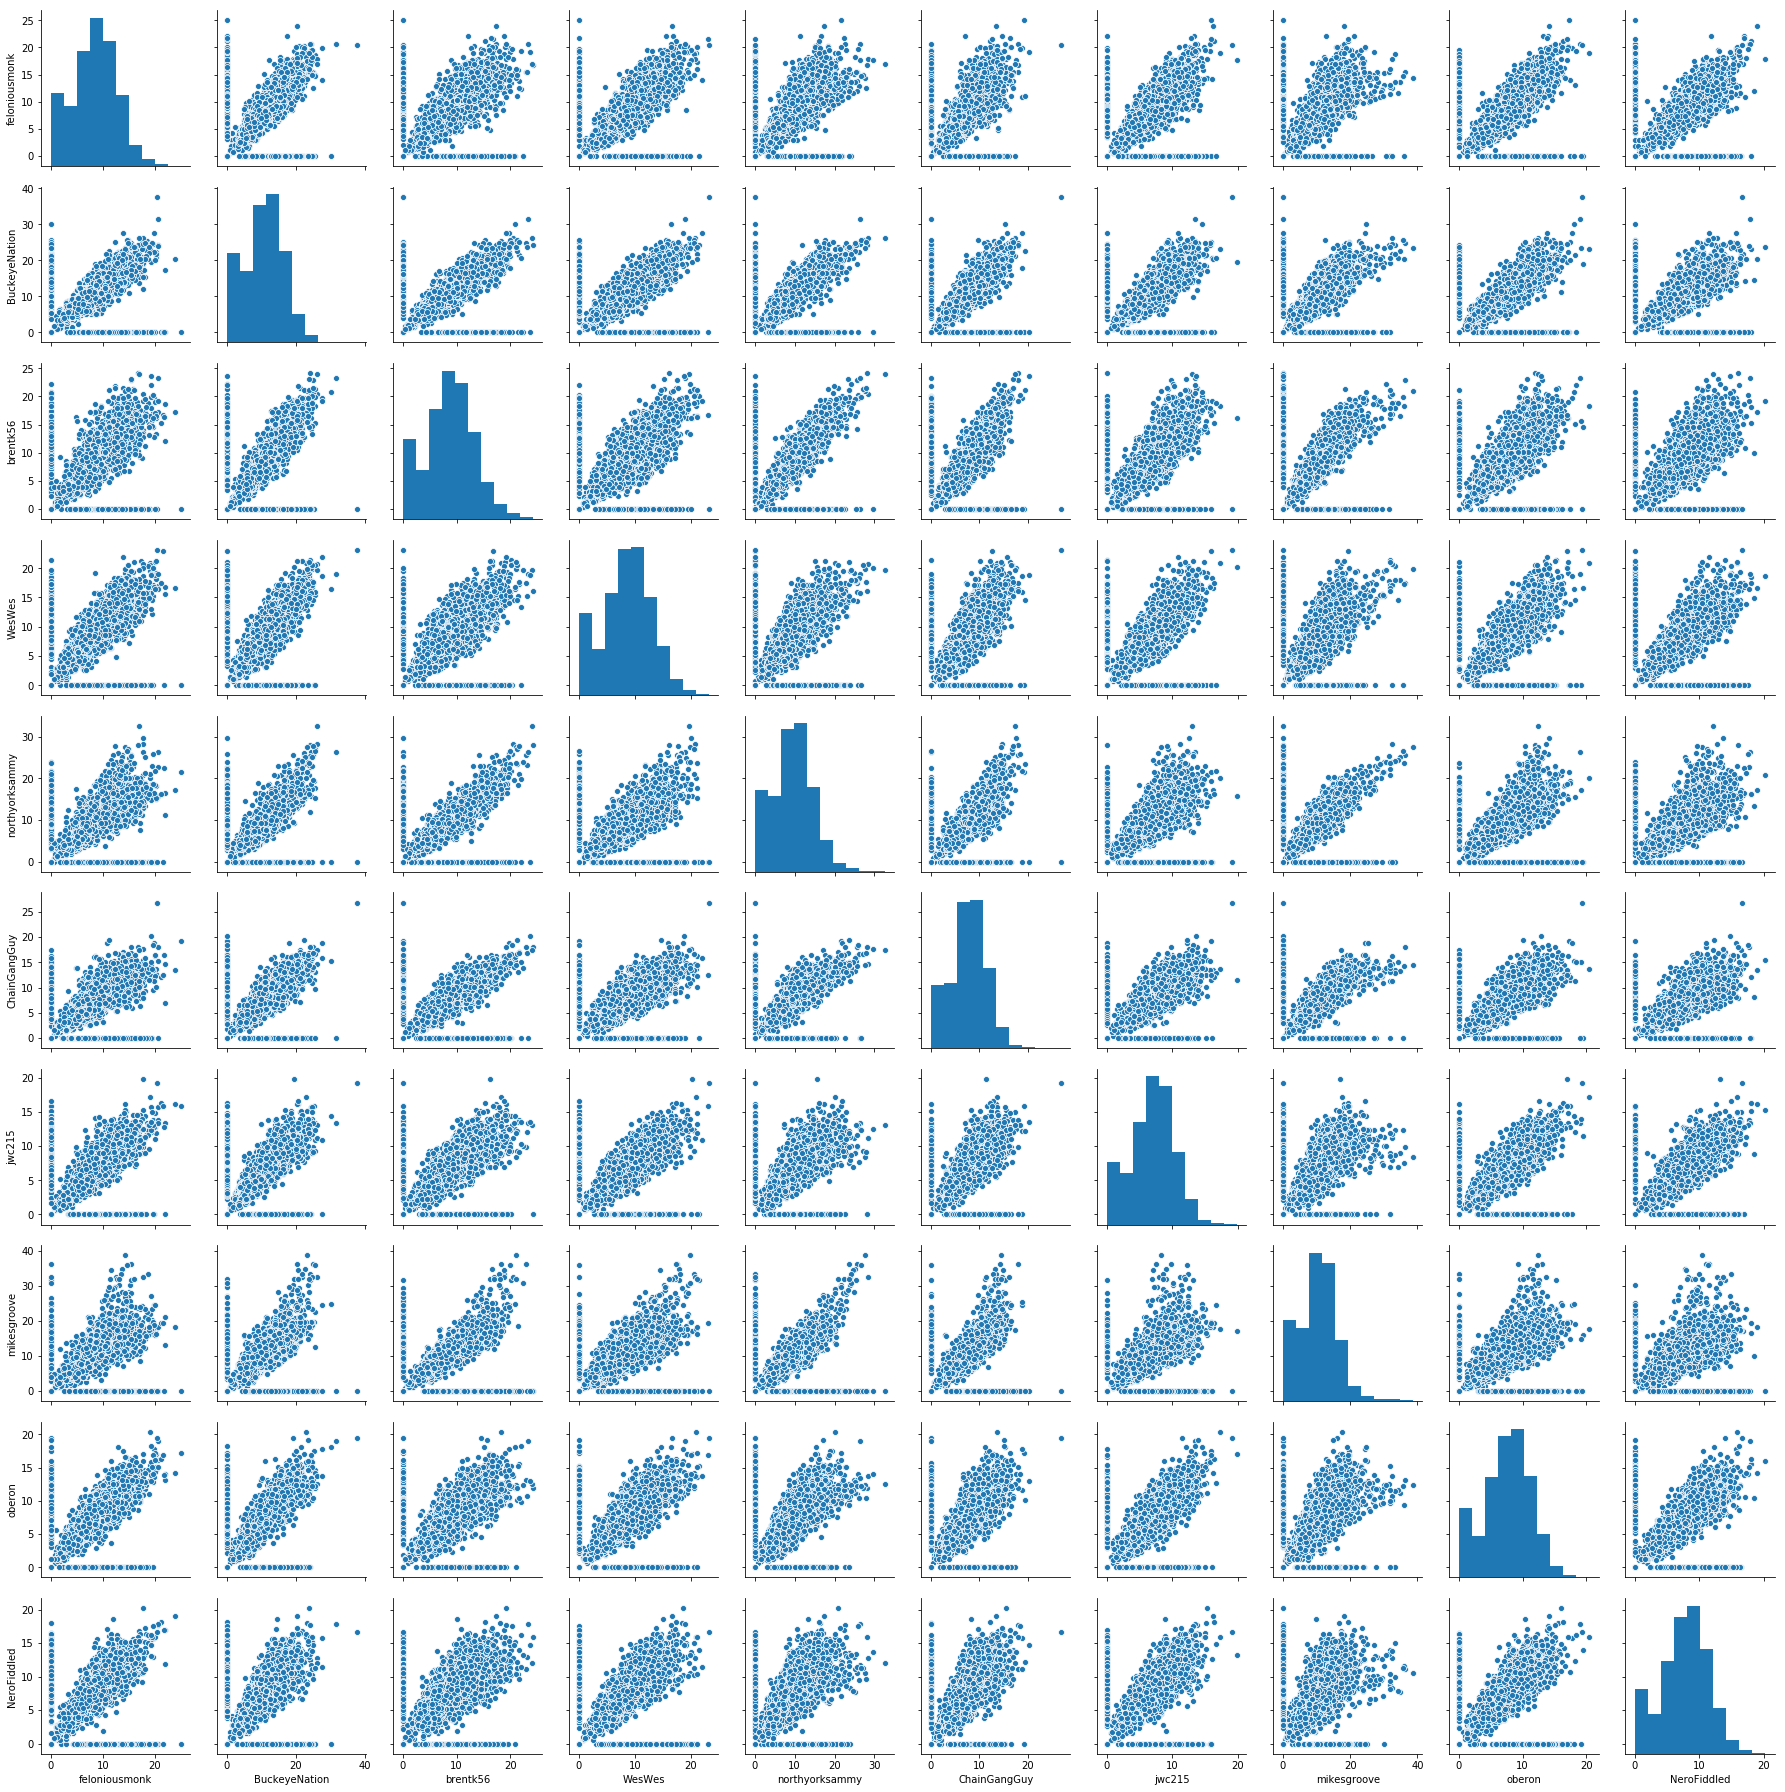

In [49]:
sns.pairplot(top10_user)
plt.show()

## Item Based Similarity

In [50]:
beer_features = train.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
).T

beer_features.head()

beer_beerid,5,7,8,9,10,11,12,13,14,15,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [52]:
df_subtracted.head()

beer_beerid,5,7,8,9,10,11,12,13,14,15,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Prediction

In [55]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[1.9762545 , 0.43051259, 0.        , ..., 1.72609374, 0.19828509,
        0.        ],
       [2.40047137, 1.28559708, 0.        , ..., 2.68948203, 0.20322994,
        0.        ],
       [0.37538401, 0.        , 0.        , ..., 0.19064043, 0.        ,
        0.        ],
       ...,
       [0.58728014, 0.52263368, 0.        , ..., 0.7827171 , 0.        ,
        0.        ],
       [0.59176663, 0.43267222, 0.        , ..., 0.55416814, 0.32515451,
        0.        ],
       [0.01019587, 1.0174354 , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [56]:
item_predicted_ratings.shape

(3948, 14557)

In [57]:
dummy_train.shape

(3948, 14557)

In [58]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head(10)

review_profilename,nan,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,...,zsk,ztoellner,zuffenhausen,zuggy9,zumicroom,zwan,zymrgy,zymurgy4all,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,1.976254,0.430513,0.0,0.0,0.531302,0.0,0.788125,0.423166,0.000000,0.141539,...,0.0,0.0,0.346167,5.115830,0.0,0.618793,0.0,1.726094,0.198285,0.0
7,2.400471,1.285597,0.0,0.0,0.361832,0.0,0.775130,0.526389,0.046011,0.533001,...,0.0,0.0,1.025948,8.944963,0.0,0.197388,0.0,2.689482,0.203230,0.0
8,0.375384,0.000000,0.0,0.0,0.225027,0.0,0.000000,0.000000,0.000000,0.002155,...,0.0,0.0,0.039363,0.060830,0.0,0.482901,0.0,0.190640,0.000000,0.0
9,0.808786,0.006843,0.0,0.0,0.026386,0.0,0.005428,0.279057,0.000000,0.077887,...,0.0,0.0,0.086430,0.709961,0.0,0.087743,0.0,0.359717,0.084545,0.0
10,3.664827,1.876961,0.0,0.0,1.491593,0.0,0.697572,1.221793,0.493641,0.889835,...,0.0,0.0,1.301393,3.446180,0.0,0.114148,0.0,2.824663,1.219911,0.0
11,0.227777,0.013197,0.0,0.0,0.045980,0.0,0.078192,0.143826,0.000000,0.000000,...,0.0,0.0,0.038061,1.169278,0.0,0.000000,0.0,0.399170,0.000000,0.0
12,0.752062,0.002003,0.0,0.0,0.215567,0.0,0.132569,0.286838,0.000000,0.001557,...,0.0,0.0,0.204797,0.910201,0.0,0.207302,0.0,0.334098,0.000000,0.0
13,0.395375,0.145979,0.0,0.0,0.048529,0.0,0.193922,0.000000,0.000000,0.025210,...,0.0,0.0,0.085448,0.572969,0.0,0.000000,0.0,0.198082,0.000000,0.0
14,2.159963,0.487029,0.0,0.0,0.462918,0.0,0.099843,0.073032,0.000000,0.217133,...,0.0,0.0,1.025169,0.761304,0.0,0.250679,0.0,1.383242,0.007186,0.0


In [59]:
item_final_rating.iloc[1].sort_values(ascending=False)[0:10]

review_profilename
Wasatch           11.975192
WilliamPhilaPa     9.587707
WakeandBake        9.507397
morbiddrumer       9.318751
zuggy9             8.944963
neenerzig          8.874038
chilidog           8.859141
avaldivia          8.853124
Matty1918          8.829709
beldav             8.823998
Name: 7, dtype: float64

 ## 3.4 Compute and visualise the similarity between the first 10 beers.

In [60]:
top10_item =item_final_rating.loc[[5,7,8,9,10,11,12,13,14,15]]
top10_item = top10_item[["Wasatch", "WilliamPhilaPa", "WakeandBake", "morbiddrumer", "zuggy9", "neenerzig","chilidog","avaldivia","Matty1918","Matty1918"]]
top10_item.head(10)

review_profilename,Wasatch,WilliamPhilaPa,WakeandBake,morbiddrumer,zuggy9,neenerzig,chilidog,avaldivia,Matty1918,Matty1918
beer_beerid,,,,,,,,,,
5,6.120968,4.479498,4.132346,5.354576,5.115830,3.350042,4.438865,0.731969,5.563287,5.563287
7,11.975192,9.587707,9.507397,9.318751,8.944963,8.874038,8.859141,8.853124,8.829709,8.829709
8,2.620650,0.717385,1.762292,0.773325,0.060830,0.500958,1.033426,0.606833,0.057879,0.057879
9,1.669001,1.347643,1.149036,1.248910,0.709961,0.846677,1.172377,3.193974,0.896385,0.896385
10,12.748940,5.635485,9.929416,6.898507,3.446180,7.785608,6.512873,4.742007,4.173050,4.173050
11,1.739327,1.718588,1.881262,1.485222,1.169278,1.176159,0.498325,0.013712,1.365722,1.365722
12,2.465334,0.756976,1.470272,1.886290,0.910201,2.781013,1.475410,1.839967,0.793718,0.793718
13,2.600264,0.911804,2.147126,1.404864,0.572969,1.038325,0.815980,0.215848,0.602993,0.602993
14,4.706269,1.454246,2.574653,3.259689,0.761304,1.670582,2.346356,2.643731,1.103542,1.103542


In [61]:
top10_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 5 to 15
Data columns (total 10 columns):
Wasatch           10 non-null float64
WilliamPhilaPa    10 non-null float64
WakeandBake       10 non-null float64
morbiddrumer      10 non-null float64
zuggy9            10 non-null float64
neenerzig         10 non-null float64
chilidog          10 non-null float64
avaldivia         10 non-null float64
Matty1918         10 non-null float64
Matty1918         10 non-null float64
dtypes: float64(10)
memory usage: 880.0 bytes


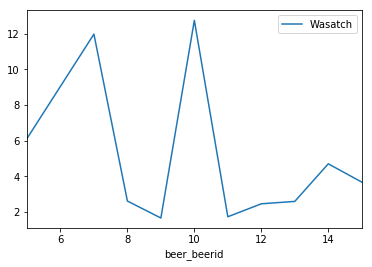

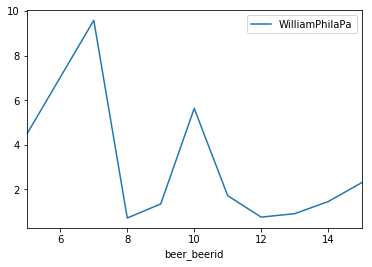

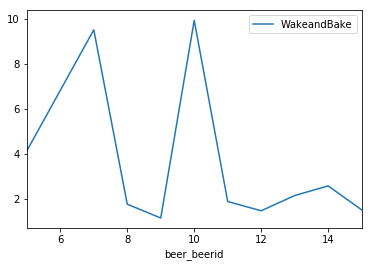

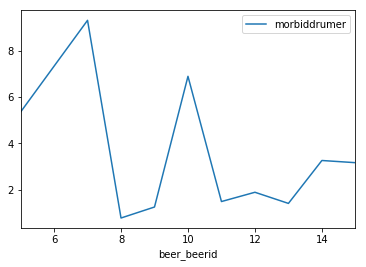

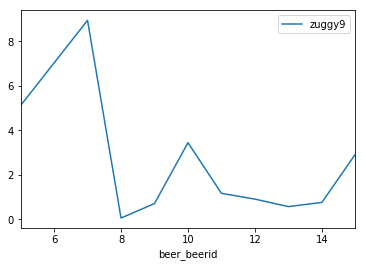

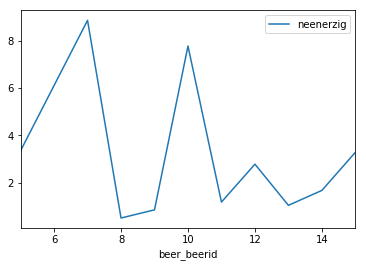

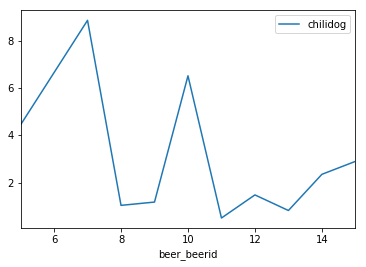

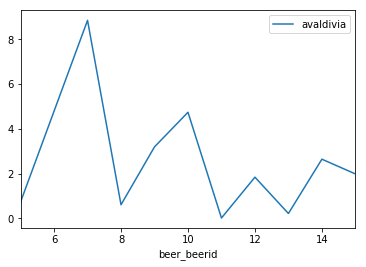

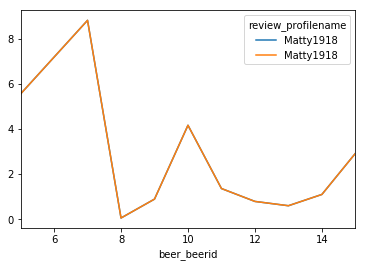

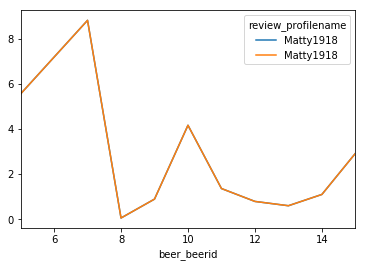

In [62]:
top10_item.plot(y='Wasatch', use_index=True)
top10_item.plot(y='WilliamPhilaPa', use_index=True)
top10_item.plot(y='WakeandBake', use_index=True)
top10_item.plot(y='morbiddrumer', use_index=True)
top10_item.plot(y='zuggy9', use_index=True)
top10_item.plot(y='neenerzig', use_index=True)
top10_item.plot(y='chilidog', use_index=True)
top10_item.plot(y='avaldivia', use_index=True)
top10_item.plot(y='Matty1918', use_index=True)
top10_item.plot(y='Matty1918', use_index=True)


## Evaluation

### Using User Similarity

In [63]:
test_beer_features = test.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.         -0.0436561   0.         ...  0.         -0.00636715
   0.        ]
 [-0.0436561   1.          0.15967007 ...  0.          0.
  -0.04818452]
 [ 0.          0.15967007  1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.         -0.00937616
   0.        ]
 [-0.00636715  0.          0.         ... -0.00937616  1.
   0.        ]
 [ 0.         -0.04818452  0.         ...  0.          0.
   1.        ]]


In [64]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.07304763, 0.14508719, 0.02425326, ..., 0.02029356, 0.        ,
        0.1491776 ],
       [0.28955591, 0.04269512, 0.05032552, ..., 0.02051166, 0.        ,
        0.05273024],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03521477, 0.        , 0.        , ..., 0.0616998 , 0.        ,
        0.        ],
       [0.03413315, 0.0547424 , 0.18745115, ..., 0.02166371, 0.        ,
        0.        ],
       [0.        , 0.        , 0.16664095, ..., 0.        , 0.        ,
        0.        ]])

### Doing prediction for the beers rated by the user

In [65]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [66]:
test_user_final_rating.head()

review_profilename,nan,0110x011,05Harley,0runkp0s,1000Bottles,100floods,1099,11millsown113,11osixBrew,160Shillings,...,ztprez,zuccard,zuffenhausen,zuggy9,zuker,zulufactor,zwan,zymurgy4all,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the RMSE for only the beers rated by user. For  RMSE, normalising the rating to (1,5) range. 

In [67]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

C:\Users\NithyaVenkataRamanaR\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\NithyaVenkataRamanaR\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [68]:
test_ = test.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
)

In [69]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [70]:
rmse = round((sum(sum((test_ - y )**2))/total_non_nan)**0.5,2)
print(rmse)

1.79


## Using Item similarity

In [71]:
test_beer_features = test.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [72]:
test_item_correlation.shape

(10317, 10317)

In [73]:
test_beer_features.shape

(10317, 3948)

In [74]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

review_profilename,nan,0110x011,05Harley,0runkp0s,1000Bottles,100floods,1099,11millsown113,11osixBrew,160Shillings,...,ztprez,zuccard,zuffenhausen,zuggy9,zuker,zulufactor,zwan,zymurgy4all,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
test_ = test.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
)

In [76]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
    index='beer_beerid',
    columns='review_profilename',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

C:\Users\NithyaVenkataRamanaR\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\NithyaVenkataRamanaR\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


MinMaxScaler(copy=True, feature_range=(1, 5))


### Finding RMSE

In [77]:
rmse = round((sum(sum((test_ - y )**2))/total_non_nan)**0.5,2)
print(rmse)

2.08


## 3.5 Compare the performance of the two models using test data and suggest the one that should be deployed.

#### RMSE of user based model is 1.79
#### RMSE of item based model is 2.08

#### Since the RMSE of user based model is low its suggested to use the user based model

## 3.6 Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

In [78]:
top3_user = user_final_rating[["cokes", "genog", "giblet"]]
top3_user.head(10)

review_profilename,cokes,genog,giblet
beer_beerid,,,
5,0.000000,1.139685,0.934937
7,6.405842,1.114653,1.199913
8,2.382072,0.435042,0.769808
9,5.747818,1.428198,1.270258
10,6.835461,0.699949,1.082267
11,0.000000,0.222516,0.814484
12,4.252788,0.159129,0.792358
13,4.590383,1.329322,1.270053
14,0.000000,0.830157,1.419183


In [79]:
top3_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3948 entries, 5 to 76144
Data columns (total 3 columns):
cokes     3948 non-null float64
genog     3948 non-null float64
giblet    3948 non-null float64
dtypes: float64(3)
memory usage: 283.4 KB


In [80]:
top5_beer = top3_user.sort_values(by=['cokes', 'genog','giblet'], ascending=False)
top5_beer.head()


review_profilename,cokes,genog,giblet
beer_beerid,,,
36656,15.390284,0.801647,2.368712
723,14.294882,0.813099,0.739842
9490,13.314100,1.180288,1.013856
31196,12.548206,0.800515,2.200910
21505,12.344880,1.558056,2.545001
